In [1]:
import sys
sys.path.insert(0, '../../utils')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Fidelity_Measure as fm

In [3]:
fm_list, fm_av, model_dms, params_list = pd.read_pickle('../../test_prediction_results_model_driven/fidelity_list_fid_av_pred_dm_params.pickle')
fm_array = np.array(fm_list)
fm_std = fm_array.std(axis=1)
fm_av = np.array(fm_av)

# data driven
# alpha_values = [0.3394171312620001,'HS_Haar', 'Brian_25',0.8, 0.3, 0.1, 0.01, 'Bures']
alpha_values = [0.01, 0.1, 0.3, 0.8, '0.3394171312620001_k_params_6_no_truncation']
# alpha_values = [0.3394171312620001,'HS_Haar', 'Brian_25',0.8, 0.3, 0.1, 'Bures']
# alpha_values = [0.3394171312620001, 'Brian_25',0.8, 'Bures', 'HS_Haar']
fd_m_list = []
fd_std_list = []
for alpha in alpha_values:
    # fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}.pickle')
    try:
        fd_list, fd_av, data_dms, params_list = pd.read_pickle(f'../../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
    except:
        fd_list, fd_av, data_dms, params_list = pd.read_pickle(
            f'../../test_prediction_results_data_driven/RUN_4_fidelity_list_fid_av_pred_dm_params_alpha_{alpha}_LAST.pickle')
        pass
    fd_std = np.array(fd_list).std(axis=1)
    fd_av = np.array(fd_av)
    fd_m_list.append(fd_av)
    fd_std_list.append(fd_std)

fd_m_array = np.array(fd_m_list)
fd_std_array = np.array(fd_std_list)

params = np.array(params_list[:15])
print("|Parameters: ", params)

|Parameters:  [  13116   46566   96691  152641  218591  294541  380491  476441  582391
  746691  930991 1760741 2840491 4170241 5749991]


alpha_values0.01 [0.81395585 0.90910524 0.92115705 0.92374579 0.92626109 0.92746565
 0.92793717 0.92818549 0.92868862 0.9290035  0.92913975 0.93004302
 0.93062744 0.93055504 0.93046688]
Max fid 0.9306274407760411
Max fid 0.025918390460779452
std fid 0.025918390460779452
alpha_values0.1 [0.78766546 0.92984379 0.95065127 0.9535609  0.95499249 0.95589892
 0.95599293 0.95686109 0.9567133  0.95593192 0.9569973  0.95680756
 0.957402   0.95815388 0.95788052]
Max fid 0.9581538787374186
Max fid 0.01801557528789272
std fid 0.01801557528789272
alpha_values0.3 [0.7576306  0.92419693 0.95817743 0.96478159 0.96861452 0.97169527
 0.97311451 0.97360459 0.97472329 0.97507496 0.97606078 0.97590573
 0.97618402 0.97680137 0.97620152]
Max fid 0.9768013734532555
Max fid 0.011383908741341233
std fid 0.011383908741341233
alpha_values0.8 [0.68402936 0.88574143 0.93147746 0.94182197 0.94898242 0.95456176
 0.95752655 0.9600974  0.96177538 0.96528376 0.96792607 0.97243046
 0.975271   0.97618087 0.97716837]
Max fi

/tmp/ipykernel_18555/3967925960.py:71: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([0, 1e7, 0.49, 1.0])


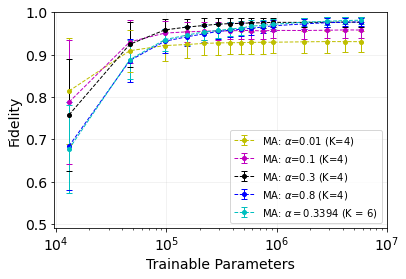

In [4]:
colors = ['y', 'm', 'k', 'b', 'c']
# colors = ['tab:brown','b', 'tab:orange','g', 'y', 'c', 'k']
# colors = ['tab:brown', 'tab:orange','c', 'k','b']
for i in range(len(alpha_values)):
    if alpha_values[i] == 'HS_Haar':
        print('HS-Haar', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'HS-Haar')
    elif alpha_values[i] == 'Brian_25':
        print('Z', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='orange', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=f'Z')
    elif alpha_values[i] == '0.3394171312620001_k_params_6_no_truncation':
        print(f'alpha_{alpha_values[i]}', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='c', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=fr'MA: $\alpha=0.3394$ (K = 6)')
    elif alpha_values[i] == 'Bures':
        print('Bures', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'Bures')

    else:
        print(f'alpha_values{alpha_values[i]}', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'Max fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                 elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=fr'MA: $\alpha$={alpha_values[i]} (K=4)')

# plt.errorbar(params, fm_av, yerr=fm_std, xerr=None, fmt='--ro', ecolor='r',
#              elinewidth=1,linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='HS')

print('Max HS', np.max(fm_av))
print('std HS', fm_std[np.argmax(fm_av)])

fs = 14 # zoomed 120.0170.010
# fs = 12

plt.xlabel(r'Trainable Parameters', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)

plt.xscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
## Not Zoomed
plt.axis([0, 1e7, 0.49, 1.0])
plt.subplots_adjust(bottom=0.13, left=0.13)
plt.grid(alpha=0.2)
plt.legend()
# plt.savefig('fid_vs_params_version_5_logx.png', dpi=600)
# plt.savefig('fid_vs_params_version_5_logx_only_MA.svg', dpi=600)
# plt.savefig('fid_vs_params_version_5_logx_only_MA.png', dpi=600)
# plt.savefig('fid_vs_params_version_5.svg', dpi=600)

plt.show()

alpha_values0.01 [0.81395585 0.90910524 0.92115705 0.92374579 0.92626109 0.92746565
 0.92793717 0.92818549 0.92868862 0.9290035  0.92913975 0.93004302
 0.93062744 0.93055504 0.93046688]
Max fid 0.9306274407760411
Max fid 0.025918390460779452
std fid 0.025918390460779452
alpha_values0.1 [0.78766546 0.92984379 0.95065127 0.9535609  0.95499249 0.95589892
 0.95599293 0.95686109 0.9567133  0.95593192 0.9569973  0.95680756
 0.957402   0.95815388 0.95788052]
Max fid 0.9581538787374186
Max fid 0.01801557528789272
std fid 0.01801557528789272
alpha_values0.3 [0.7576306  0.92419693 0.95817743 0.96478159 0.96861452 0.97169527
 0.97311451 0.97360459 0.97472329 0.97507496 0.97606078 0.97590573
 0.97618402 0.97680137 0.97620152]
Max fid 0.9768013734532555
Max fid 0.011383908741341233
std fid 0.011383908741341233
alpha_values0.8 [0.68402936 0.88574143 0.93147746 0.94182197 0.94898242 0.95456176
 0.95752655 0.9600974  0.96177538 0.96528376 0.96792607 0.97243046
 0.975271   0.97618087 0.97716837]
Max fi

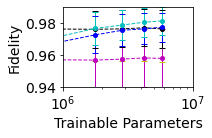

In [6]:
colors = ['y', 'm', 'k', 'b', 'c']
# colors = ['tab:brown','b', 'tab:orange','g', 'y', 'c', 'k']
# colors = ['tab:brown', 'tab:orange','c', 'k','b']
for i in range(len(alpha_values)):
    if alpha_values[i] == 'HS_Haar':
        print('HS-Haar', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'HS-Haar')
    elif alpha_values[i] == 'Brian_25':
        print('Z', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='orange', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=f'Z')
    elif alpha_values[i] == '0.3394171312620001_k_params_6_no_truncation':
        print(f'alpha_{alpha_values[i]}', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--o', color='c', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     # markerfacecolor="None",
                     # markeredgecolor='orange',
                     label=fr'MA: $\alpha=0.3394$ (K = 6)')
    elif alpha_values[i] == 'Bures':
        print('Bures', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                     elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                     xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None,
                     label=f'Bures')

    else:
        print(f'alpha_values{alpha_values[i]}', fd_m_array[i])
        print(f'Max fid', np.max(fd_m_array[i]))
        print(f'Max fid', fd_std_array[i][np.argmax(fd_m_array[i])])
        print(f'std fid', fd_std_array[i][np.argmax(fd_m_array[i])])

        plt.errorbar(params, fd_m_array[i], yerr=fd_std_array[i], xerr=None, fmt=f'--{colors[i]}o', ecolor=colors[i],
                 elinewidth=1, linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
                 xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=fr'MA: $\alpha$={alpha_values[i]} (K=4)')

# plt.errorbar(params, fm_av, yerr=fm_std, xerr=None, fmt='--ro', ecolor='r',
#              elinewidth=1,linewidth=1, markersize=4, capsize=3, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='HS')

print('Max HS', np.max(fm_av))
print('std HS', fm_std[np.argmax(fm_av)])

fs = 14 # zoomed 120.0170.010
# fs = 12

plt.xlabel(r'Trainable Parameters', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)

plt.xscale('log')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# ## Not Zoomed
# plt.axis([0, 1e7, 0.49, 1.0])
# plt.subplots_adjust(bottom=0.13, left=0.13)
# plt.grid(alpha=0.2)
# plt.legend()
# # plt.savefig('fid_vs_params_version_5_logx.png', dpi=600)
# # plt.savefig('fid_vs_params_version_5_logx_only_MA.svg', dpi=600)
# # plt.savefig('fid_vs_params_version_5_logx_only_MA.png', dpi=600)
# # plt.savefig('fid_vs_params_version_5.svg', dpi=600)
#
# plt.show()
# Zoomed
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.axis([1e6, 1e7, 0.94, .99])
plt.subplots_adjust(bottom=0.6, left=0.6)
# plt.savefig('fid_vs_params_zoomed_no_mle_logx_only_MA.svg', dpi=600)
# plt.savefig('fid_vs_params_zoomed_no_mle_logx_only_MA.png', dpi=600)

plt.show()